# Column Transformation

To obtain a prediction with a better performance, it is needed to evaluate if feature in the model. To this aim, each of them will be explored to see if they have a normal distribution since they will be more meaningful to the model in this way.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')
from modules.color_formater import colored, random_hex_colors
from modules.plotter import chang_hug_map

In [2]:
root = '../data/regression/cars_reg.csv'

df = pd.read_csv(root)

df.head()

,year,kms,seats,power,co2_emiss,height,length,width,trunk_vol,max_speed,...,doors_2,doors_3,doors_4,doors_5,brand_encoded,model_encoded,city_encoded,color_encoded,type_encoded,chassis_encoded
0,2014,37125,2,71,99,157,270,156,203,145,...,1.0,0.0,0.0,0.0,11039.980916,10171.125628,15841.032810,17003.852965,28170.085203,20696.065144
1,2009,0,4,200,179,140,426,181,292,235,...,0.0,1.0,0.0,0.0,17058.096993,13160.993789,18052.176748,17003.852965,28170.085203,31261.850521
2,2021,0,5,150,109,142,453,180,430,222,...,0.0,0.0,1.0,0.0,23593.497861,23508.383973,18554.493671,21242.844857,28170.085203,31261.850521
3,2017,85000,5,190,142,162,467,188,500,212,...,0.0,0.0,0.0,1.0,23593.497861,36412.589552,16569.441935,17003.852965,28170.085203,31261.850521
4,2005,95017,2,506,488,123,446,191,344,189,...,1.0,0.0,0.0,0.0,12506.369072,17783.891805,17303.956434,17436.456262,28170.085203,31261.850521


## Represent curves distribution

In [3]:
X = df.drop('price', axis=1)

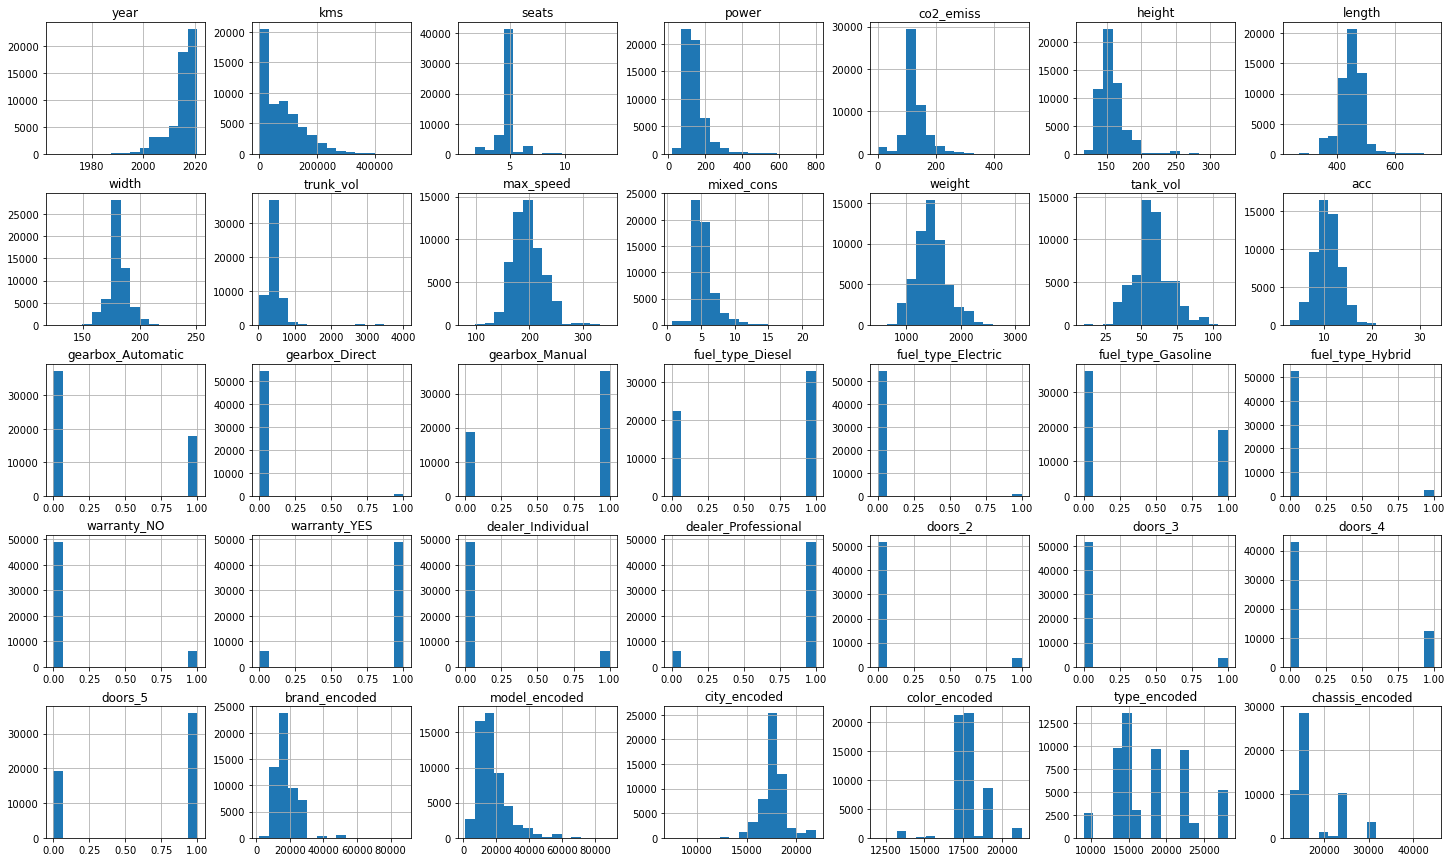

In [4]:
fig, axes = plt.subplots(len(X.columns)//6, 7, figsize=(25, 15))

i = 0
for triaxis in axes:
    for axis in triaxis:
        df.hist(column=X.columns[i], bins=15, ax=axis)
        i += 1

### Separate binary columns (OneHotEncoded) from the ones with distributed values

In [5]:
ohe_mask = X.isin([0,1]).all()

X_ohe = X[X.columns[ohe_mask]]
X_dst = X[X.columns[~ohe_mask]]

display(X_ohe)
display(X_dst)

,gearbox_Automatic,gearbox_Direct,gearbox_Manual,fuel_type_Diesel,fuel_type_Electric,fuel_type_Gasoline,fuel_type_Hybrid,warranty_NO,warranty_YES,dealer_Individual,dealer_Professional,doors_2,doors_3,doors_4,doors_5
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55321,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
55322,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
55323,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
55324,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


,year,kms,seats,power,co2_emiss,height,length,width,trunk_vol,max_speed,mixed_cons,weight,tank_vol,acc,brand_encoded,model_encoded,city_encoded,color_encoded,type_encoded,chassis_encoded
0,2014,37125,2,71,99,157,270,156,203,145,4.3,780,33,13.7,11039.980916,10171.125628,15841.032810,17003.852965,28170.085203,20696.065144
1,2009,0,4,200,179,140,426,181,292,235,7.6,1373,55,7.2,17058.096993,13160.993789,18052.176748,17003.852965,28170.085203,31261.850521
2,2021,0,5,150,109,142,453,180,430,222,4.2,1545,42,8.5,23593.497861,23508.383973,18554.493671,21242.844857,28170.085203,31261.850521
3,2017,85000,5,190,142,162,467,188,500,212,5.4,1740,67,8.0,23593.497861,36412.589552,16569.441935,17003.852965,28170.085203,31261.850521
4,2005,95017,2,506,488,123,446,191,344,189,21.0,1546,70,3.9,12506.369072,17783.891805,17303.956434,17436.456262,28170.085203,31261.850521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55321,2016,60000,5,75,100,148,402,175,285,164,3.8,1237,45,14.8,12850.655659,11980.345216,18965.842225,17003.852965,24125.953305,15131.850727
55322,2016,70261,6,190,158,188,514,193,1030,206,6.0,2145,67,9.1,26831.477053,40573.610879,17303.956434,19080.509292,24125.953305,14177.381352
55323,2015,182069,5,140,139,163,462,186,412,187,5.3,1828,60,10.9,25865.686411,28652.349939,15706.924710,17975.461741,24125.953305,23421.348833
55324,2011,159000,5,258,149,166,465,188,550,230,6.0,1800,67,6.2,23593.497861,29654.348315,18052.176748,17003.852965,24125.953305,23421.348833


## Power Transformations: Box-Cox and Yeo-Johnson

Many machine learning algorithms perform better when the distribution of variables is Gaussian. To this aim, `PowerTransformations` will be applied since they will make the probability distribution of a variable more Gaussian.

In [6]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.model_selection import train_test_split

In [7]:
try:
    boxcox = PowerTransformer(method='box-cox', standardize=False)
    X_trf = boxcox.fit_transform(X)
except ValueError as e:
    print(colored(255, 118, 118, f'ValueError: {e}'))

ValueError: The Box-Cox transformation can only be applied to strictly positive data 


This error states that we cannot use the transform if the data is not `strictly positive`. Therefore, it is needed to firstly apply a Standardization of the columns before applying the `Box-Cox` column transformation method. To this aim, `MinMaxScaler` will help us on this task by using a `Pipeline`.

Applying [Chang & Hug](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py) map of preprocessing data to a normal distribution.

In [8]:
# Visualizing the format of distributions before applying the column transformer
distributions = []
for i in range(0, len(X.columns)):
    name = X.columns[i]
    array = X[X.columns[i]].to_numpy().reshape(-1,1)
    distributions.append((name, array))
    
distributions[:2]

[('year',
  array([[2014],
         [2009],
         [2021],
         ...,
         [2015],
         [2011],
         [2016]])),
 ('kms',
  array([[ 37125],
         [     0],
         [     0],
         ...,
         [182069],
         [159000],
         [ 78000]]))]

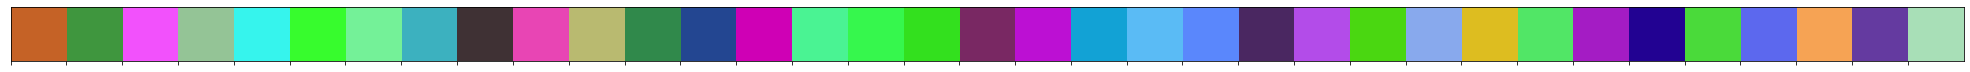

In [15]:
hex_colors = random_hex_colors(35)
sns.palplot(hex_colors)

`chang_hug_map` function created to easily plot the column transformation analysis of 29 variables.

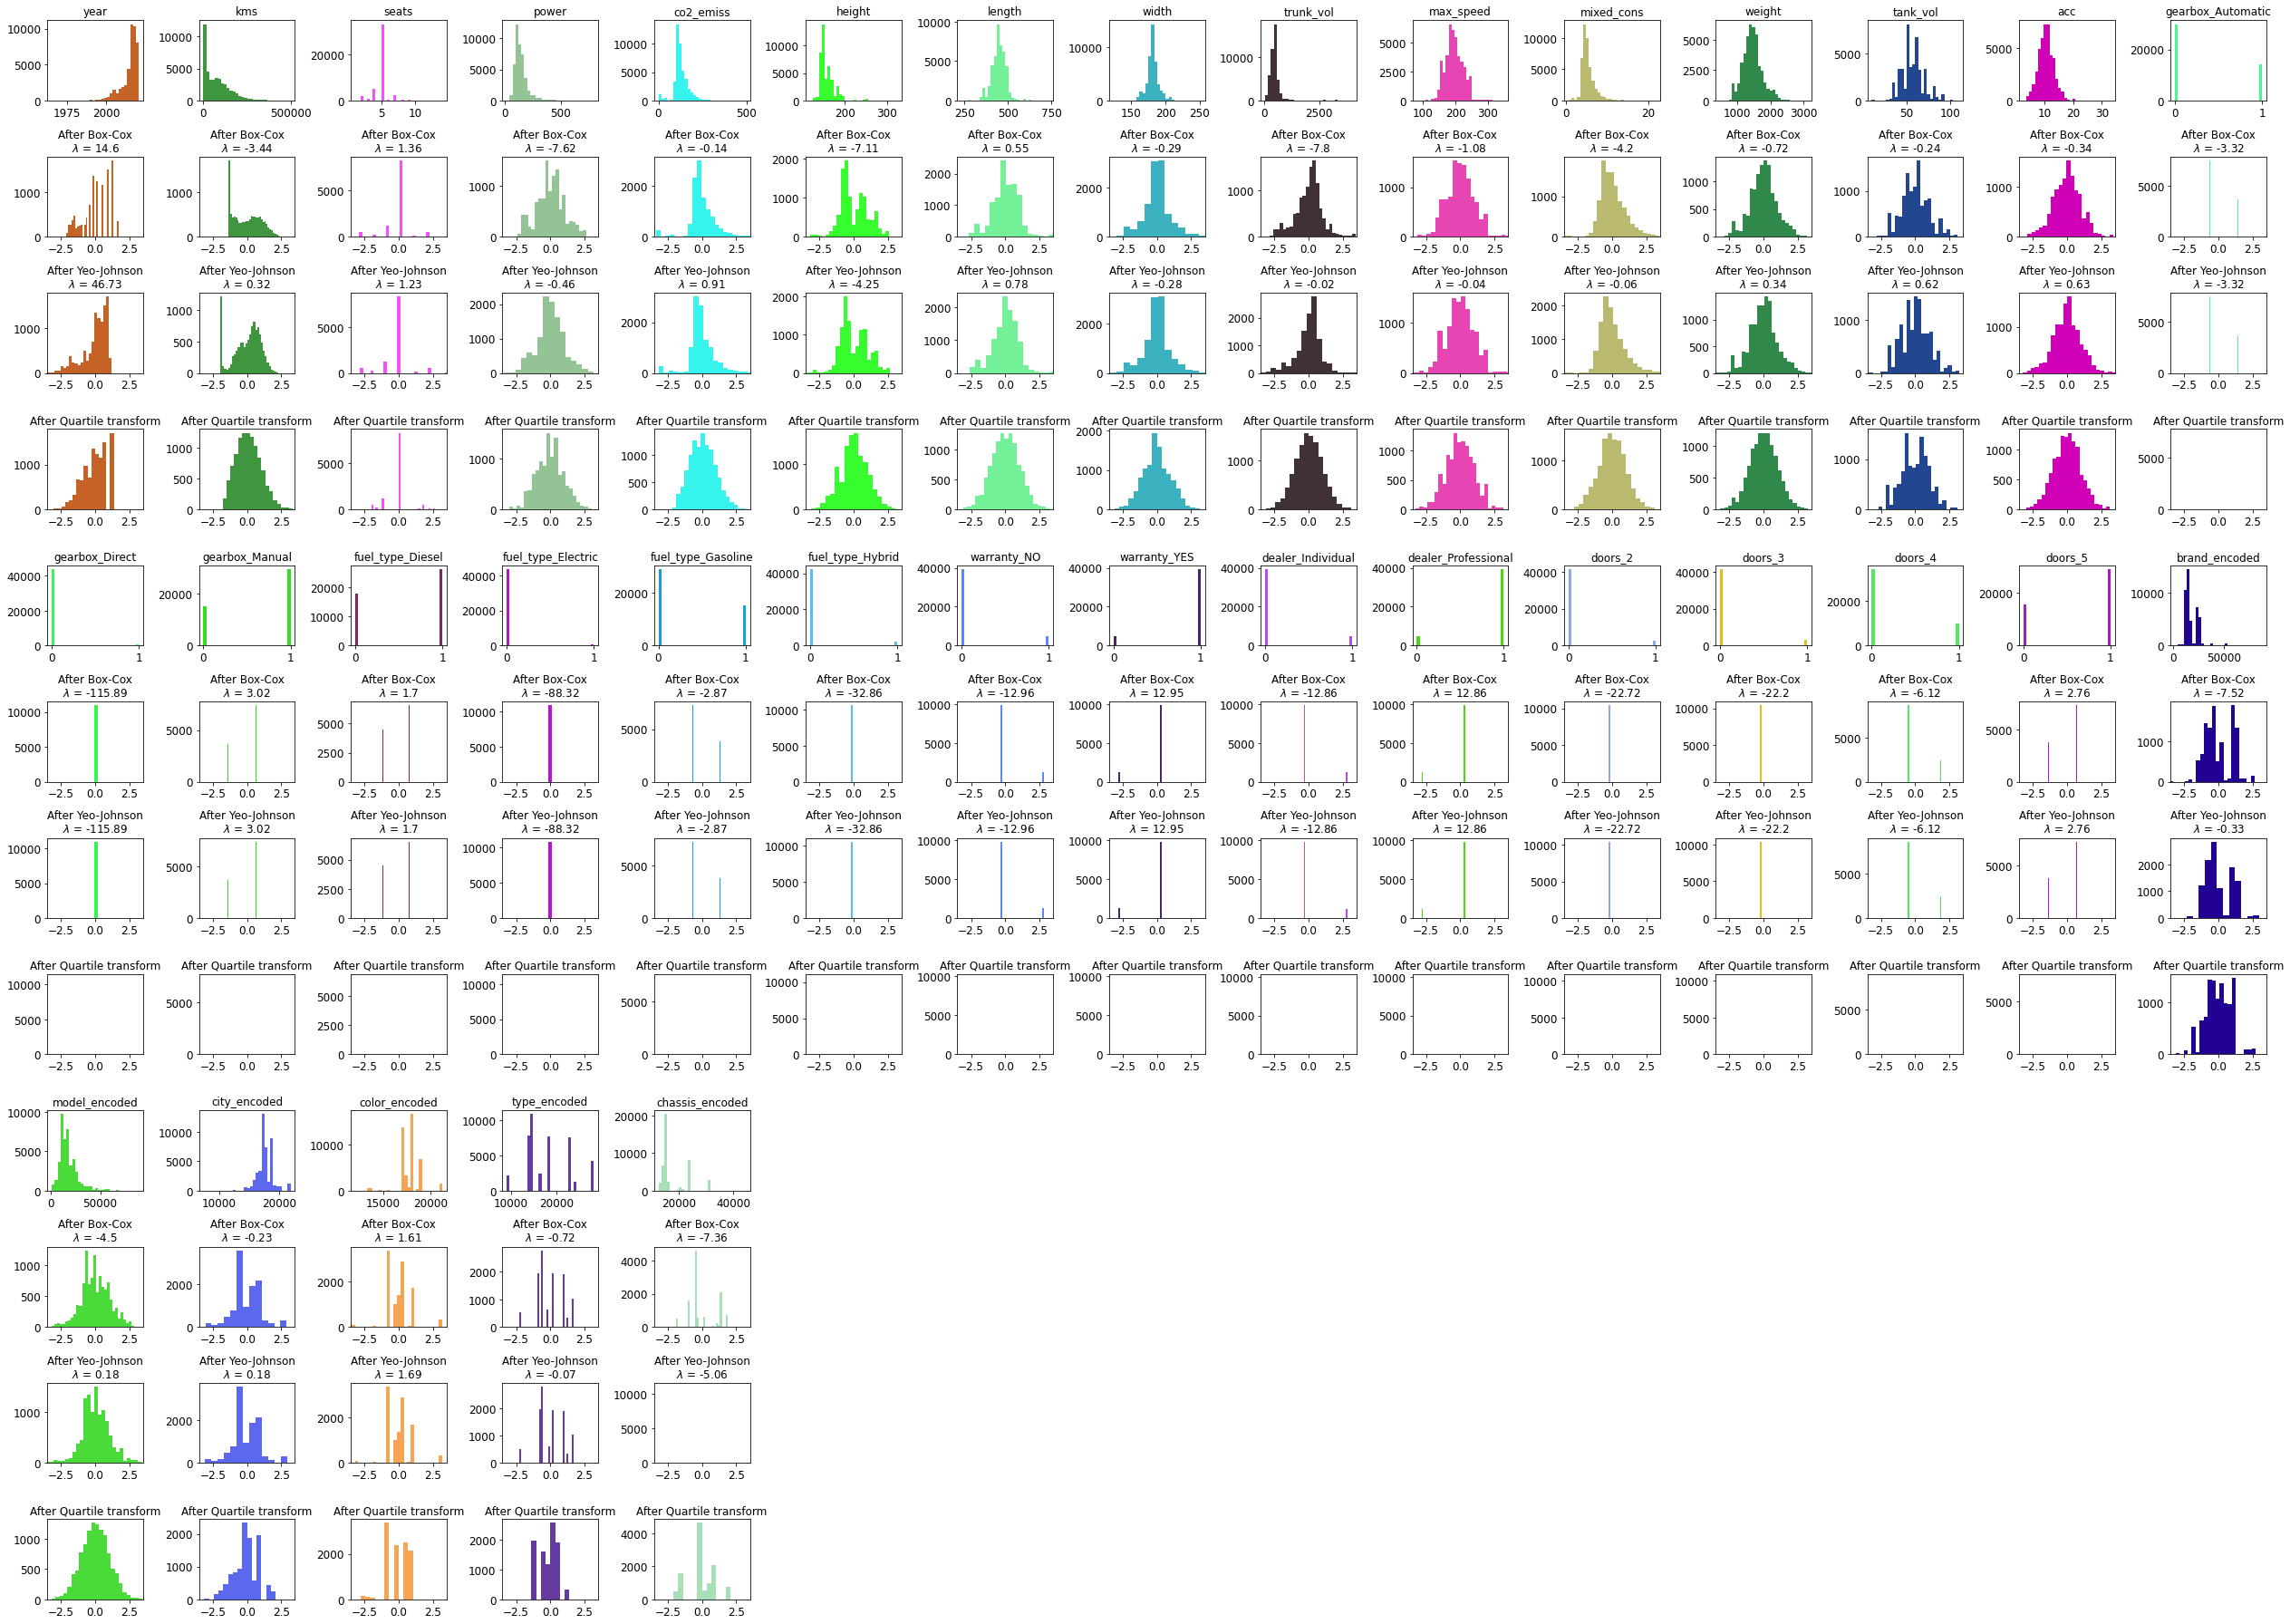

In [16]:
import warnings
warnings.filterwarnings(action='ignore')
chang_hug_map(X=X, hex_colors=hex_colors, FONT_SIZE=12, BINS=30)

## Conclusions

After exploring and visualizing the data, there is a method with an outstanding performance compared to the rest. The following column transformation methods were applied to each of the features: `Box-Cox, Yeo-Johnson & Quantile transforms`.

`Quantile Transformations` was the one resulting in the most satisfactory results. This could be explained due to the fact that this transformation produced the most normalized distributions from the inputs. As we have previously covered, the main objective was to obtain outputs that could resemble gaussian distributions. In this way, machine learning algorithms can addapt better to the `features` of the model, improving the way they interpret their impact to the `target`, which is in this case cars' price.

Finally, we will explore the impact to the performance of the algorithms: `RandomForest, XGBoost, CatBoost`. To reach to this conclusion, the `r2_score` will be used as the evaluator to measure the results before and after applying the `Quantile Transformer`. What is more, the model will be evaluated including and not including the transformation of `OneHotEncoded` columns: `gearbox_*, fuel_type_*, warranty_*, dealer_*, doors_*`.